In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
train_data= pd.read_csv('train_house.csv')

In [3]:
train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [4]:
train_data=train_data.drop(['Id','YearBuilt','YearRemodAdd','YrSold','MiscVal','YrSold','GarageYrBlt'],axis=1)

In [5]:
train_data= train_data[train_data['MSSubClass'] != 0]

In [6]:
train_data=train_data.replace('SBrkr',0)

In [7]:
train_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,2,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,NaN,NaN,5,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,9,WD,Normal,223500


In [8]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,755000.000000


In [9]:
train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,...,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.013585,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.011200,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,0.070815,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,-0.003511,-0.077856
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.005965,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,-0.011378
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.034888,0.214479
TotalBsmtSF,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,0.013196,0.613581


## Data Preprocessing


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
train_data.MSZoning=le.fit_transform(train_data.MSZoning)

In [12]:
train_data.Street=le.fit_transform(train_data.Street)


In [13]:
train_data.LotShape=le.fit_transform(train_data.LotShape)

In [14]:
train_data.LandContour=le.fit_transform(train_data.LandContour)

In [15]:
train_data.Utilities=le.fit_transform(train_data.Utilities)


In [16]:

train_data.LotConfig=le.fit_transform(train_data.LotConfig)

In [17]:
train_data.LandSlope=le.fit_transform(train_data.LandSlope)


In [18]:
train_data.Neighborhood=le.fit_transform(train_data.Neighborhood)

In [19]:
train_data.Condition1=le.fit_transform(train_data.Condition1)

In [20]:
train_data.Condition2=le.fit_transform(train_data.Condition2)

In [21]:
train_data.BldgType=le.fit_transform(train_data.BldgType)

In [22]:
train_data.HouseStyle=le.fit_transform(train_data.HouseStyle)

In [23]:
train_data.RoofStyle=le.fit_transform(train_data.RoofStyle)

In [24]:
train_data.RoofMatl=le.fit_transform(train_data.RoofMatl)

In [25]:
train_data.Exterior1st=le.fit_transform(train_data.Exterior1st)


In [26]:
train_data.Exterior2nd=le.fit_transform(train_data.Exterior2nd)

In [27]:
train_data.ExterQual=le.fit_transform(train_data.ExterQual)

In [28]:
train_data.ExterCond=le.fit_transform(train_data.ExterCond)

In [29]:
train_data.Heating=le.fit_transform(train_data.Heating)

In [30]:
train_data.HeatingQC=le.fit_transform(train_data.HeatingQC)

In [31]:
train_data.Foundation=le.fit_transform(train_data.Foundation)

In [32]:
train_data.CentralAir=le.fit_transform(train_data.CentralAir)

In [33]:
train_data.KitchenQual=le.fit_transform(train_data.KitchenQual)

In [34]:
train_data.Functional=le.fit_transform(train_data.Functional)

In [35]:
train_data.ExterQual=le.fit_transform(train_data.ExterQual)

In [36]:
train_data.KitchenQual=le.fit_transform(train_data.KitchenQual)

In [37]:
train_data.HeatingQC=le.fit_transform(train_data.HeatingQC)

In [38]:
train_data.SaleType=le.fit_transform(train_data.SaleType)
train_data.SaleCondition=le.fit_transform(train_data.SaleCondition)

<BarContainer object of 1460 artists>

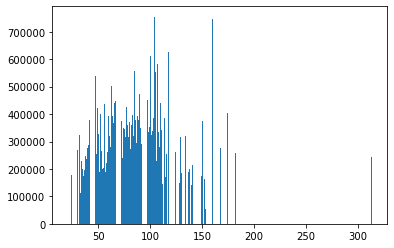

In [39]:
plt.bar(train_data['LotFrontage'],train_data['SalePrice'])

In [40]:
train_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,NaN,3,3,0,4,...,0,0,0,NaN,NaN,NaN,2,8,4,208500
1,20,3,80.0,9600,1,NaN,3,3,0,2,...,0,0,0,NaN,NaN,NaN,5,8,4,181500
2,60,3,68.0,11250,1,NaN,0,3,0,4,...,0,0,0,NaN,NaN,NaN,9,8,4,223500


In [41]:
train_data=train_data.fillna(0)

In [42]:
train_data=train_data.replace('TA',0)

In [43]:
train_data=train_data.replace('Gd',0)


In [44]:
train_data=train_data.replace('Fa',0)

In [45]:
train_data=train_data.replace('Po',0)

In [46]:
train_data=train_data.replace('Ex',0)

In [47]:
train_data=train_data.replace('Y',0)

In [48]:
train_data=train_data.replace('N',0)

In [49]:
train_data=train_data.replace('P',0)

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()

In [51]:
X = train_data[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation',  'BsmtCond','BsmtUnfSF', 'TotalBsmtSF',
       'Heating','CentralAir','1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces',
        'GarageCars', 'GarageArea',
       'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
     'MoSold', 'SaleType',
       'SaleCondition']]

In [52]:
y = train_data['SalePrice']

In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [54]:
model.fit(X,y)

LinearRegression()

In [55]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [56]:
model.coef_

array([-9.16070698e+01, -9.73922616e+02,  7.01152618e+00,  3.35120744e-01,
        3.40599840e+04, -1.50006716e+03,  3.46106112e+03, -5.88854885e+04,
        1.73153715e+01,  8.38837107e+03,  3.60650239e+02, -2.78260834e+02,
       -8.29188920e+03, -1.90575201e+03, -4.90502929e+02,  1.35705017e+04,
        3.16067643e+03,  1.43966810e+03,  4.19015732e+03, -8.89396458e+02,
        3.84401584e+02,  2.73824634e+01, -1.23546443e+04,  1.74703042e+03,
        4.35941980e+03,  2.75576895e-10, -9.63957342e+00,  1.59382156e+01,
       -3.21880142e+03,  4.06393264e+03,  2.02434619e+01,  1.77968902e+01,
       -1.69402906e+01,  2.11000616e+01,  9.94821756e+03,  3.90078398e+03,
        8.12189250e+03,  6.26224208e+02, -6.24139646e+03, -1.69910482e+04,
       -1.06212641e+04,  3.89216234e+03,  4.30338414e+03,  3.34694891e+03,
        1.30929360e+04, -7.61517260e+00, -5.09317033e-11,  2.17141860e-11,
        2.53657132e+01, -1.40549201e+01,  1.59195352e+01,  4.39728166e+01,
       -2.25697080e+01,  

In [57]:
model.score(X,y)

0.8369824430153633